In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

fi = pd.read_csv('food inspection.csv', low_memory=False)
print(f'Shape: {fi.shape}')
print(f'Columns: {list(fi.columns)}')

print(f'\nKey Column Values')
if 'violstatus' in fi.columns:
    print(f'\nViolation Status:\n{fi["violstatus"].value_counts()}')
if 'viollevel' in fi.columns:
    print(f'\nViolation Level:\n{fi["viollevel"].value_counts()}')
if 'result' in fi.columns:
    print(f'\nInspection Result:\n{fi["result"].value_counts()}')

print(f'\nMissing Values (top 10)')
null_pct = (fi.isnull().sum() / len(fi) * 100).sort_values(ascending=False)
print(null_pct.head(10).round(1))

Shape: (872366, 26)
Columns: ['businessname', 'dbaname', 'legalowner', 'namelast', 'namefirst', 'licenseno', 'issdttm', 'expdttm', 'licstatus', 'licensecat', 'descript', 'result', 'resultdttm', 'violation', 'viol_level', 'violdesc', 'violdttm', 'viol_status', 'status_date', 'comments', 'address', 'city', 'state', 'zip', 'property_id', 'location']

Key Column Values

Inspection Result:
result
HE_Fail       364508
HE_Pass       278490
HE_Filed       92427
HE_FailExt     70871
HE_Hearing     27099
HE_NotReq      23976
HE_TSOP         7669
HE_VolClos      2561
HE_OutBus       2511
Pass             964
HE_Closure       711
Fail             238
HE_FAILNOR       146
HE_Misc          125
DATAERR           42
HE_Hold           17
Failed             6
Closed             2
PassViol           2
NoViol             1
Name: count, dtype: int64

Missing Values (top 10)
dbaname        99.0
status_date    58.6
namefirst      42.5
legalowner     34.8
property_id    17.9
comments        9.9
location      

In [14]:
#  Parse dates 
fi['resultdttm'] = pd.to_datetime(fi['resultdttm'], errors='coerce')
fi['year'] = fi['resultdttm'].dt.year
fi['month'] = fi['resultdttm'].dt.month

#  Map zip to neighborhood 
zip_to_nbhd = {
    '02134': 'Allston/Brighton', '02135': 'Allston/Brighton', '02115': 'Back Bay/Fenway',
    '02215': 'Back Bay/Fenway', '02116': 'South End', '02118': 'South End',
    '02119': 'Roxbury', '02120': 'Mission Hill', '02121': 'Dorchester',
    '02122': 'Dorchester', '02124': 'Dorchester', '02125': 'Dorchester',
    '02126': 'Mattapan', '02127': 'South Boston', '02128': 'East Boston',
    '02129': 'Charlestown', '02130': 'Jamaica Plain', '02131': 'Roslindale',
    '02132': 'West Roxbury', '02136': 'Hyde Park', '02210': 'Seaport',
    '02111': 'Downtown', '02108': 'Beacon Hill', '02109': 'North End',
    '02113': 'North End', '02114': 'West End',
}
fi['zip_clean'] = fi['zip'].astype(str).str[:5].str.strip()
fi['neighborhood'] = fi['zip_clean'].map(zip_to_nbhd).fillna('Other')

#  Severity from viol_level 
print('Violation Level Distribution')
print(fi['viol_level'].value_counts())

fi['severity'] = fi['viol_level'].map({'*': 1, '**': 2, '***': 3}).fillna(0).astype(int)

#  Simplify result into Pass/Fail 
fi['result_simple'] = fi['result'].apply(
    lambda x: 'Fail' if 'Fail' in str(x) or 'FAIL' in str(x) else (
              'Pass' if 'Pass' in str(x) else 'Other'))

print(f'\nSimplified Results')
print(fi['result_simple'].value_counts())

print(f'\nNeighborhood Distribution (top 15)')
print(fi['neighborhood'].value_counts().head(15))

Violation Level Distribution
viol_level
*       572798
***     125322
**      107646
-         6346
1919         1
             1
Name: count, dtype: int64

Simplified Results
result_simple
Fail     435769
Pass     279456
Other    157141
Name: count, dtype: int64

Neighborhood Distribution (top 15)
neighborhood
Dorchester          118128
South End           105473
Back Bay/Fenway      88152
Allston/Brighton     68314
East Boston          60280
North End            50586
Downtown             46241
Jamaica Plain        41756
Other                38304
Roxbury              32945
Beacon Hill          31012
South Boston         30044
West End             29715
Roslindale           24517
West Roxbury         23262
Name: count, dtype: int64


 SLICE 1: Neighborhood Representation
  Dorchester: 13.5%
  South End: 12.1%
  Back Bay/Fenway: 10.1%
  Allston/Brighton: 7.8%
  East Boston: 6.9%
  North End: 5.8%
  Downtown: 5.3%
  Jamaica Plain: 4.8%
  Other: 4.4%
  Roxbury: 3.8%
  Beacon Hill: 3.6%
  South Boston: 3.4%
  West End: 3.4%
  Roslindale: 2.8%
  West Roxbury: 2.7%
  Mission Hill: 2.4%
  Seaport: 2.2%
  Hyde Park: 1.9% ⚠️ UNDERREPRESENTED
  Mattapan: 1.8% ⚠️ UNDERREPRESENTED
  Charlestown: 1.3% ⚠️ UNDERREPRESENTED


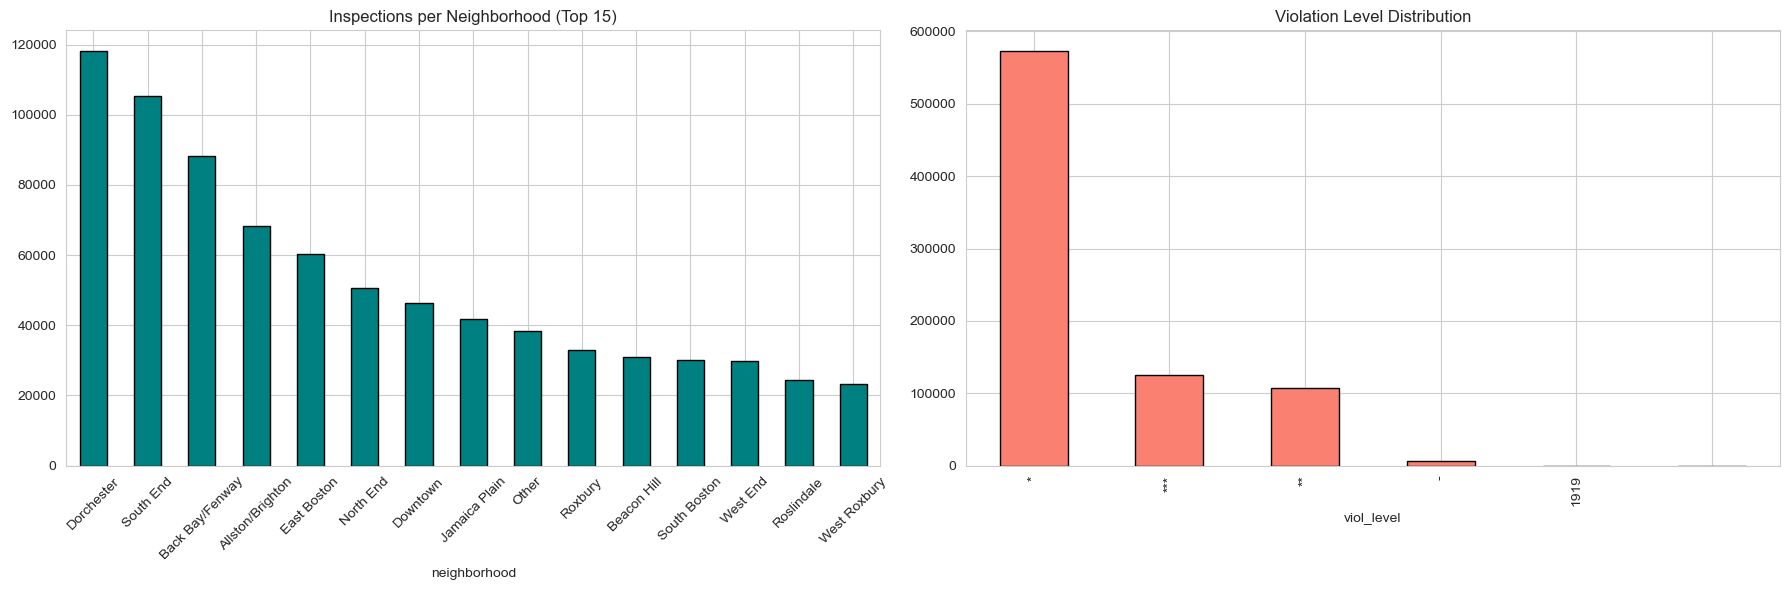


 Kruskal-Wallis: Severity by Neighborhood
H-statistic: 1115.0003
p-value:     0.000000
Significant: True

Mean severity by neighborhood:
neighborhood
Downtown            1.3733
South End           1.3704
Dorchester          1.3656
North End           1.3551
Allston/Brighton    1.3521
Back Bay/Fenway     1.3471
Other               1.3214
Jamaica Plain       1.3155
Roxbury             1.3154
East Boston         1.2797
Name: severity, dtype: float64

CV: 0.0227

 Chi-Square: Fail Rate by Neighborhood 
Chi-square: 3817.4443, p-value: 0.000000
Significant: True

Fail rate by neighborhood:
neighborhood
Jamaica Plain       53.8
Roxbury             53.0
Dorchester          52.1
South End           50.9
North End           50.0
Back Bay/Fenway     49.6
Downtown            48.5
Allston/Brighton    47.9
East Boston         46.1
Other               46.0
Name: result_simple, dtype: float64

Fail rate gap: 7.8%

 Violation Level Class Imbalance 
  "*": 70.5% ⚠️ DOMINANT CLASS
  "***": 15.4%
  "**":

In [16]:
#SLICE 1: Neighborhood — inspection frequency 
print(' SLICE 1: Neighborhood Representation')
nbhd_pct = fi['neighborhood'].value_counts(normalize=True) * 100
for n, p in nbhd_pct.items():
    flag = ' ⚠️ UNDERREPRESENTED' if p < 2 else ''
    print(f'  {n}: {p:.1f}%{flag}')

#Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

fi['neighborhood'].value_counts().head(15).plot(kind='bar', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_title('Inspections per Neighborhood (Top 15)')
axes[0].tick_params(axis='x', rotation=45)

fi['viol_level'].value_counts().plot(kind='bar', ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Violation Level Distribution')

plt.tight_layout()
plt.show()

# SLICE 2: Kruskal-Wallis — severity by neighborhood
print('\n Kruskal-Wallis: Severity by Neighborhood')
top_nbhds = fi['neighborhood'].value_counts().head(10).index
groups = [fi[fi['neighborhood'] == n]['severity'].dropna().values for n in top_nbhds]
stat, p = stats.kruskal(*groups)
print(f'H-statistic: {stat:.4f}')
print(f'p-value:     {p:.6f}')
print(f'Significant: {p < 0.05}')

sev_by_nbhd = fi[fi['neighborhood'].isin(top_nbhds)].groupby('neighborhood')['severity'].mean()
print(f'\nMean severity by neighborhood:')
print(sev_by_nbhd.sort_values(ascending=False).round(4))
cv = sev_by_nbhd.std() / sev_by_nbhd.mean()
print(f'\nCV: {cv:.4f}')

#  SLICE 3: Chi-Square — Fail rate by neighborhood 
print('\n Chi-Square: Fail Rate by Neighborhood ')
fi_top = fi[fi['neighborhood'].isin(top_nbhds)]
contingency = pd.crosstab(fi_top['neighborhood'], fi_top['result_simple'])
chi2, p_chi, dof, _ = stats.chi2_contingency(contingency)
print(f'Chi-square: {chi2:.4f}, p-value: {p_chi:.6f}')
print(f'Significant: {p_chi < 0.05}')

fail_rate = fi_top.groupby('neighborhood')['result_simple'].apply(
    lambda x: (x == 'Fail').mean() * 100
).sort_values(ascending=False).round(1)
print(f'\nFail rate by neighborhood:')
print(fail_rate)
print(f'\nFail rate gap: {fail_rate.max() - fail_rate.min():.1f}%')

#  SLICE 4: Class imbalance in violation level 
print('\n Violation Level Class Imbalance ')
viol_dist = fi['viol_level'].value_counts(normalize=True) * 100
for level, pct in viol_dist.items():
    flag = ' ⚠️ DOMINANT CLASS' if pct > 50 else ''
    print(f'  "{level}": {pct:.1f}%{flag}')

In [18]:
# MITIGATION 1: Class rebalancing for violation level
print(' Mitigation 1: Violation Level Class Rebalancing')
# Show before
print('Before:')
print(fi['viol_level'].value_counts())

# Undersample dominant class to match 2nd largest
valid_levels = ['*', '**', '***']
fi_valid = fi[fi['viol_level'].isin(valid_levels)].copy()
target_size = fi_valid['viol_level'].value_counts().iloc[1]  # 2nd largest

balanced_dfs = []
for level in valid_levels:
    group = fi_valid[fi_valid['viol_level'] == level]
    if len(group) > target_size:
        balanced_dfs.append(group.sample(n=target_size, random_state=42))
    else:
        balanced_dfs.append(group)

fi_balanced = pd.concat(balanced_dfs, ignore_index=True)
print(f'\nAfter undersampling:')
print(fi_balanced['viol_level'].value_counts())
print(f'\nOriginal: {len(fi_valid)} → Balanced: {len(fi_balanced)}')

# MITIGATION 2: Oversample underrepresented neighborhoods
print('\nMitigation 2: Oversampling Underrepresented Neighborhoods')
min_pct = 2.0
target_count = int(len(fi) * min_pct / 100)

fi_mit = fi.copy()
for nbhd, group in fi.groupby('neighborhood'):
    pct = len(group) / len(fi) * 100
    if pct < min_pct and len(group) > 0:
        needed = target_count - len(group)
        if needed > 0:
            fi_mit = pd.concat([fi_mit, group.sample(n=needed, replace=True, random_state=42)])
            print(f'  {nbhd}: {len(group)} → {len(group)+needed}')

print(f'\nOriginal: {len(fi)} → Mitigated: {len(fi_mit)}')

# MITIGATION 3: Stratified split by neighborhood
print('\n Mitigation 3: Stratified Time-Based Split')
fi_sorted = fi.dropna(subset=['resultdttm']).sort_values('resultdttm')
n = len(fi_sorted)
train = fi_sorted.iloc[:int(n*0.70)]
val   = fi_sorted.iloc[int(n*0.70):int(n*0.85)]
test  = fi_sorted.iloc[int(n*0.85):]

print(f'Train: {len(train)} | Val: {len(val)} | Test: {len(test)}')
print(f'\nFail rate across splits:')
for name, split in [('Full', fi_sorted), ('Train', train), ('Val', val), ('Test', test)]:
    fail_pct = (split['result_simple'] == 'Fail').mean() * 100
    print(f'  {name}: {fail_pct:.1f}%')
print('✓ Time-based split preserves temporal order')

 Mitigation 1: Violation Level Class Rebalancing
Before:
viol_level
*       572798
***     125322
**      107646
-         6346
1919         1
             1
Name: count, dtype: int64

After undersampling:
viol_level
*      125322
***    125322
**     107646
Name: count, dtype: int64

Original: 805766 → Balanced: 358290

Mitigation 2: Oversampling Underrepresented Neighborhoods
  Charlestown: 11208 → 17447
  Hyde Park: 16625 → 17447
  Mattapan: 15758 → 17447

Original: 872366 → Mitigated: 881116

 Mitigation 3: Stratified Time-Based Split
Train: 597975 | Val: 128138 | Test: 128138

Fail rate across splits:
  Full: 50.8%
  Train: 50.1%
  Val: 50.1%
  Test: 54.6%
✓ Time-based split preserves temporal order
